# Orientation analysis

This is an example of a orientation analysis using .TFBS from motif sites.

## Create CombObj and fill it with .TFBS from motif scanning

In [1]:
import tfcomb
C = tfcomb.CombObj(verbosity=0)

In [2]:
C.TFBS_from_motifs(regions="../data/GM12878_hg38_chr4_ATAC_peaks.bed", 
                   motifs="../data/HOCOMOCOv11_HUMAN_motifs.txt",
                   genome="../data/hg38_chr4_masked.fa.gz", 
                   threads=8)

For this analysis, we will run count_within() with the stranded option turned on:

In [3]:
C.count_within(stranded=True, threads=8)
C.market_basket()

In [4]:
C.rules

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,cosine,zscore
KLF1(-)-KLF9(-),KLF1(-),KLF9(-),145,291,209,0.587961,66.330168
KLF9(-)-KLF1(-),KLF9(-),KLF1(-),145,209,291,0.587961,66.330168
KLF1(-)-KLF12(-),KLF1(-),KLF12(-),152,291,240,0.575164,61.565308
KLF12(-)-KLF1(-),KLF12(-),KLF1(-),152,240,291,0.575164,61.565308
KLF12(-)-KLF9(-),KLF12(-),KLF9(-),127,240,209,0.567055,62.215597
...,...,...,...,...,...,...,...
STAT2(+)-SP1(+),STAT2(+),SP1(+),1,556,636,0.001682,-5.135968
NFE2L1(+)-SP2(+),NFE2L1(+),SP2(+),1,451,798,0.001667,-4.294191
SP2(+)-NFE2L1(+),SP2(+),NFE2L1(+),1,798,451,0.001667,-4.294191
BCL11A(+)-SP1(-),BCL11A(+),SP1(-),1,562,653,0.001651,-4.399691


## Analyze preferential orientation of motifs

First, we create a directionality analysis for the rules found:

In [5]:
df = C.analyze_orientation()

INFO: Rules are symmetric - scenarios counted are: ['same', 'opposite']


In [6]:
df.head()

,TF1,TF2,TF1_TF2_count,same,opposite,std,pvalue
SP3-SP4,SP3,SP4,534,0.758427,0.241573,0.365471,7.004689e-33
PATZ1-SP1,PATZ1,SP1,631,0.730586,0.269414,0.326098,4.936837e-31
PATZ1-SP3,PATZ1,SP3,642,0.725857,0.274143,0.319410,2.479952e-30
SP1-SP3,SP1,SP3,756,0.705026,0.294974,0.289951,1.751909e-29
KLF1-KLF9,KLF1,KLF9,243,0.851852,0.148148,0.497594,5.347598e-28


We can subset these on pvalue and number of sites:

In [7]:
selected = df[(df["pvalue"] < 0.01) & (df["TF1_TF2_count"] > 50)]

In [8]:
#Number of TF pairs with significant differences in orientation
selected.shape[0]

476

We can also use the .loc-operator of the pandas dataframe to show the results of a subset of TF1-TF2-pairs:

In [9]:
df.loc[["EGR1-IRF4", "SP1-TAF1"]]

,TF1,TF2,TF1_TF2_count,same,opposite,std,pvalue
EGR1-IRF4,EGR1,IRF4,15,0.866667,0.133333,0.518545,0.004509
SP1-TAF1,SP1,TAF1,153,0.679739,0.320261,0.254189,0.000009


## Visualization of orientation preference

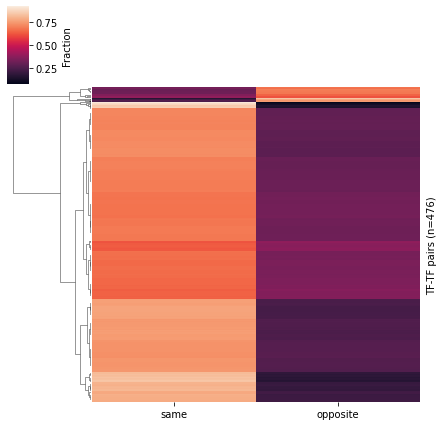

In [10]:
_ = selected.plot_heatmap()

We can select the subsets by investigating the selected pairs:

In [11]:
selected.sort_values("same").head(5)

,TF1,TF2,TF1_TF2_count,same,opposite,std,pvalue
KLF3-ZIC3,KLF3,ZIC3,66,0.166667,0.833333,0.471405,6.093838e-08
SP1-ZFX,SP1,ZFX,81,0.222222,0.777778,0.392837,5.733031e-07
PATZ1-ZFX,PATZ1,ZFX,74,0.229730,0.770270,0.382220,3.320871e-06
SP4-ZFX,SP4,ZFX,52,0.250000,0.750000,0.353553,3.114910e-04
ASCL1-WT1,ASCL1,WT1,61,0.262295,0.737705,0.336166,2.047606e-04


In [12]:
selected.sort_values("opposite").head(5)

,TF1,TF2,TF1_TF2_count,same,opposite,std,pvalue
KLF4-KLF5,KLF4,KLF5,63,0.920635,0.079365,0.594868,2.432643e-11
ETV4-KLF3,ETV4,KLF3,57,0.912281,0.087719,0.583053,4.806291e-10
KLF9-KLF9,KLF9,KLF9,123,0.886179,0.113821,0.546139,1.072707e-17
KLF4-MAZ,KLF4,MAZ,70,0.871429,0.128571,0.525279,5.126299e-10
KLF4-KLF9,KLF4,KLF9,74,0.864865,0.135135,0.515997,3.443424e-10


-----------

## Extended analysis with directional=True

The first analysis presented does not take into account the relative order of TF1-TF2, e.g. if the orientation "same" represents "TF1-TF2" or 

In [13]:
C.count_within(directional=True, stranded=True, threads=8)
C.market_basket()

In [14]:
df = C.analyze_orientation()

INFO: Rules are directional - scenarios counted are: ['TF1-TF2', 'TF2-TF1', 'convergent', 'divergent']


In [15]:
df.head()

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
SP2-SP2,SP2,SP2,1077,0.395543,0.395543,0.102136,0.106778,0.168069,8.140464e-79
SP1-SP1,SP1,SP1,687,0.417758,0.417758,0.075691,0.088792,0.193784,8.390630e-67
SP3-SP3,SP3,SP3,718,0.412256,0.412256,0.094708,0.080780,0.187444,2.559523e-65
PATZ1-PATZ1,PATZ1,PATZ1,547,0.422303,0.422303,0.078611,0.076782,0.198960,4.875297e-56
SP4-SP4,SP4,SP4,371,0.444744,0.444744,0.070081,0.040431,0.225196,1.132384e-48


Similarly to the first analysis, we can select the significant pairs and visualize the preferences for orientation:

In [16]:
selected = df[(df["pvalue"] < 0.05) & (df["TF1_TF2_count"] > 50)]

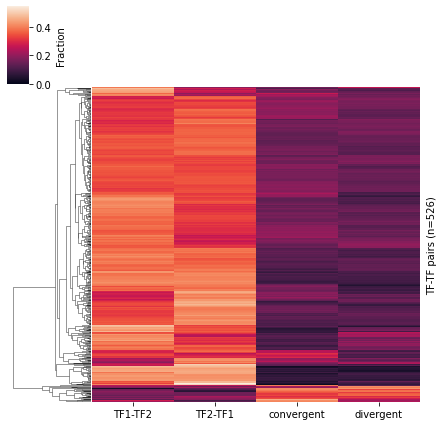

In [17]:
_ = selected.plot_heatmap()

----------

## In-depth look at preferential orientation

By sorting the selected co-occurring TF pairs, it is also possible to visualize the top pairs within each scenario as seen below.

### TFs specific in TF1-TF2 orientation

In [18]:
selected.sort_values("TF1-TF2", ascending=False).head()

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
KLF9-ZNF341,KLF9,ZNF341,80,0.500000,0.337500,0.100000,0.062500,0.206408,6.866468e-09
KLF1-KLF4,KLF1,KLF4,97,0.494845,0.360825,0.041237,0.103093,0.214005,1.575098e-11
KLF4-KLF4,KLF4,KLF4,56,0.482143,0.482143,0.017857,0.017857,0.268055,1.851271e-10
BCL11A-SPIB,BCL11A,SPIB,56,0.482143,0.321429,0.107143,0.089286,0.187287,3.069277e-05
KLF5-ZNF341,KLF5,ZNF341,61,0.475410,0.278689,0.114754,0.131148,0.167382,1.331723e-04


### TFs specific in TF2-TF2 orientation

In [19]:
selected.sort_values("TF2-TF1", ascending=False).head()

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
KLF4-MAZ,KLF4,MAZ,70,0.328571,0.542857,0.042857,0.085714,0.232262,7.933608e-10
EGR1-KLF9,EGR1,KLF9,72,0.277778,0.541667,0.138889,0.041667,0.217248,7.288757e-09
KLF4-KLF5,KLF4,KLF5,63,0.380952,0.539683,0.000000,0.079365,0.253430,1.621951e-10
ETV4-KLF3,ETV4,KLF3,57,0.403509,0.508772,0.017544,0.070175,0.242831,9.055097e-09
E2F6-SP4,E2F6,SP4,80,0.275000,0.500000,0.137500,0.087500,0.184560,3.725792e-07


### TFs specific in convergent orientation

In [20]:
selected.sort_values("convergent", ascending=False).head()

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
ASCL1-SP3,ASCL1,SP3,55,0.127273,0.181818,0.454545,0.236364,0.143452,0.003533
MAZ-ZFX,MAZ,ZFX,54,0.203704,0.111111,0.444444,0.240741,0.140627,0.005055
SP1-ZFX,SP1,ZFX,81,0.111111,0.111111,0.419753,0.358025,0.162343,0.000011
AR-IRF1,AR,IRF1,51,0.274510,0.098039,0.411765,0.215686,0.130433,0.015372
ASCL1-WT1,ASCL1,WT1,61,0.147541,0.114754,0.409836,0.327869,0.141892,0.002055


### TFs specific in divergent orientation

In [21]:
selected.sort_values("divergent", ascending=False).head()

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
STAT2-ZFP28,STAT2,ZFP28,55,0.127273,0.254545,0.181818,0.436364,0.134738,7.445704e-03
KLF3-ZIC3,KLF3,ZIC3,66,0.030303,0.136364,0.409091,0.424242,0.197358,9.148367e-07
IRF3-ZFP28,IRF3,ZFP28,58,0.206897,0.155172,0.224138,0.413793,0.113059,3.069838e-02
NFE2L1-STAT2,NFE2L1,STAT2,68,0.176471,0.220588,0.205882,0.397059,0.099740,4.364185e-02
SP4-ZFX,SP4,ZFX,52,0.192308,0.057692,0.365385,0.384615,0.154645,1.883579e-03
